In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('//content/winequality-red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)
val_df = df.drop(train_df.index)

In [ ]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range


In [ ]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

input_shape = [X_train.shape[1]]

input_shape


[11]

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=input_shape)])

# after you create your model it's
# always a good habit to print out it's summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([

	tf.keras.layers.Dense(units=64, activation='relu',
						input_shape=input_shape),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=1)
])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                768       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4993 (19.50 KB)
Trainable params: 4993 (19.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae')


In [ ]:
losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )

Epoch 1/15
5/5 [==============================] - 1s 55ms/step - loss: 0.3415 - val_loss: 0.2173
Epoch 2/15
5/5 [==============================] - 0s 13ms/step - loss: 0.1674 - val_loss: 0.1257
Epoch 3/15
5/5 [==============================] - 0s 18ms/step - loss: 0.1402 - val_loss: 0.1532
Epoch 4/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1529 - val_loss: 0.1370
Epoch 5/15
5/5 [==============================] - 0s 10ms/step - loss: 0.1339 - val_loss: 0.1221
Epoch 6/15
5/5 [==============================] - 0s 9ms/step - loss: 0.1273 - val_loss: 0.1245
Epoch 7/15
5/5 [==============================] - 0s 14ms/step - loss: 0.1280 - val_loss: 0.1209
Epoch 8/15
5/5 [==============================] - 0s 15ms/step - loss: 0.1224 - val_loss: 0.1156
Epoch 9/15
5/5 [==============================] - 0s 11ms/step - loss: 0.1190 - val_loss: 0.1152
Epoch 10/15
5/5 [==============================] - 0s 16ms/step - loss: 0.1175 - val_loss: 0.1130
Epoch 11/15
5/5 [=============

In [ ]:
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 95ms/step


array([[0.40683234],
       [0.51884645],
       [0.41432214]], dtype=float32)

In [ ]:
y_val.iloc[0:3]

0     0.4
9     0.4
12    0.4
Name: quality, dtype: float64

<Axes: >

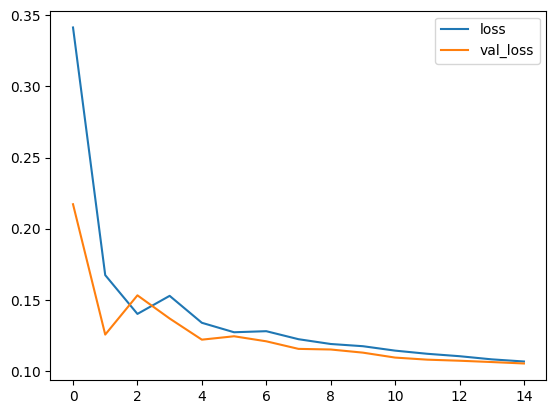

In [ ]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['loss','val_loss']].plot()